In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
# %matplotlib notebook


import numpy as np
import imageio
from tqdm import tqdm


In [2]:
x = torch.randn((1000,2), requires_grad=True)
y= torch.unsqueeze(x[:,0].pow(2)+x[:,1].pow(2) +torch.rand(x[:,0].size())         # noisy y data (tensor), shape=(100, 1)
, dim=1)

# torch can only train on Variable, so convert them to V1ariable
x,y= Variable(x), Variable(y)

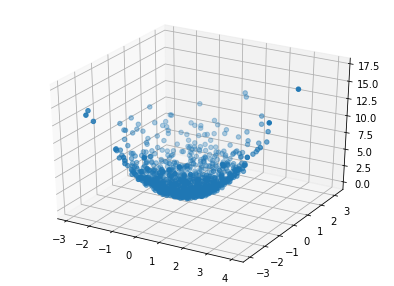

In [3]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x[:,0].data.numpy(),x[:,1].data.numpy(),y.data.numpy())
plt.show()

In [4]:
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(2, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, 100),
        torch.nn.LeakyReLU(),      
        torch.nn.Linear(100, 1),


    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.005)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [5]:
x_test=torch.randn((1000,2))

In [6]:
y_test=net(x_test)

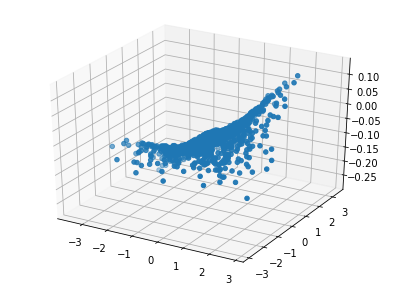

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x_test[:,0].data.numpy(),x_test[:,1].data.numpy(),y_test.data.numpy())
plt.show()

  0%|          | 1/500 [00:00<01:45,  4.74it/s]<ipython-input-10-3bb8d737ac3e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(1, 2, 2)
100%|██████████| 500/500 [00:59<00:00,  8.43it/s]


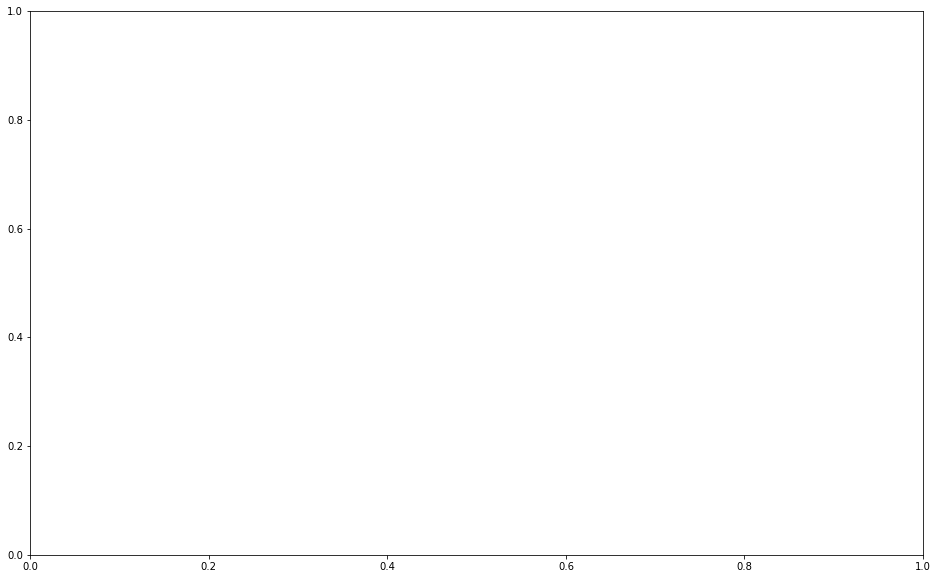

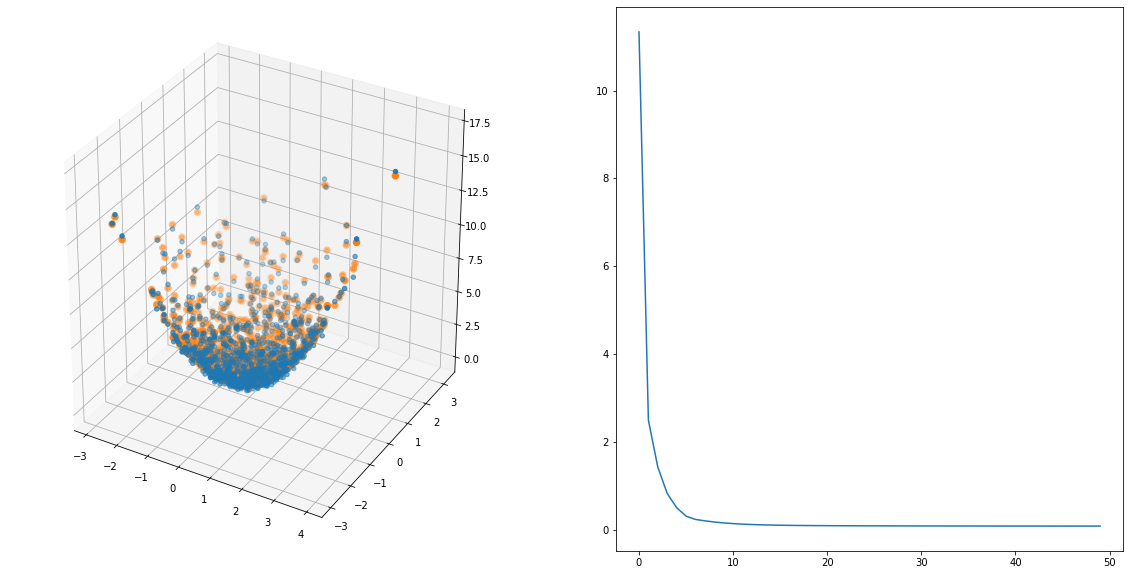

In [10]:
my_images = []
lost=[]
fig, ax = plt.subplots(figsize=(16,10))

# start training
for t in tqdm(range(500)):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0:
        # plot and show learning process
        lost.append(loss.data.numpy())
        plt.cla()
        fig = plt.figure(num=2,figsize=(20,10))
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax1.scatter(x[:,0].data.numpy(),x[:,1].data.numpy(),y.data.numpy())
        ax1.scatter(x[:,0].data.numpy(),x[:,1].data.numpy(),prediction.data.numpy(), 'g-', lw=3)
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.plot(lost)
        #         ax.text(9.50, -500, 'Step = %d' % t, fontdict={'size': 18, 'color':  'red'})
#         ax.text(9.50, -700, 'Loss = %.4f' % loss.data.numpy(),
#                 fontdict={'size': 18, 'color':  'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)
#     if t%100==0:
#         print(str(t)+" epoch")
    
    


# save images as a gif    
imageio.mimsave('./3d-fit.gif', my_images, fps=10)